In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"C:\Users\satya\Downloads\NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
data.shape

(34, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [6]:
data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [7]:
data.drop('Newspaper',axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: xlabel='daily', ylabel='Density'>

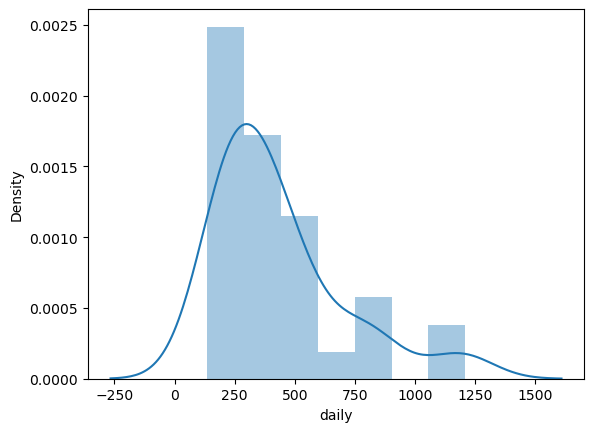

In [8]:
sns.distplot(data['daily'])

<Axes: xlabel='sunday', ylabel='Density'>

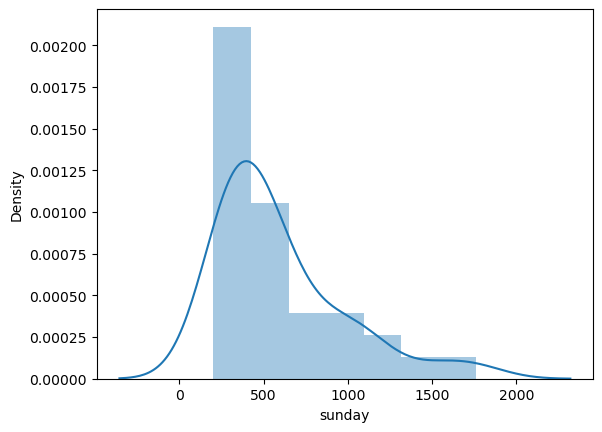

In [9]:
sns.distplot(data['sunday'])

In [10]:
import statsmodels.formula.api as smf
model=smf.ols('sunday~daily',data=data).fit()

<Axes: xlabel='daily', ylabel='sunday'>

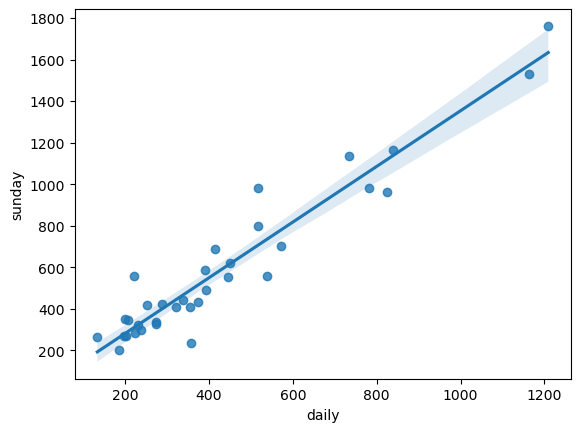

In [11]:
sns.regplot(x='daily',y='sunday',data=data)

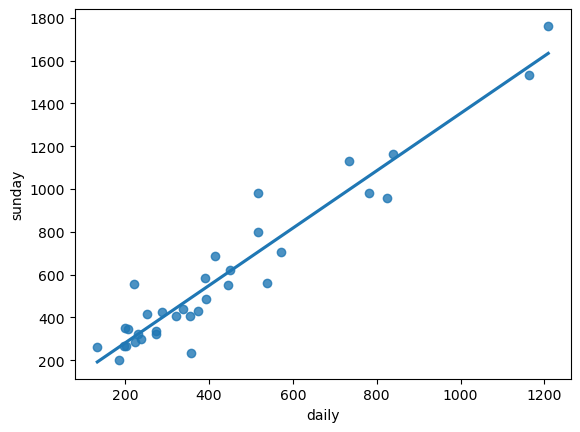

In [12]:
sns.regplot(x='daily',y='sunday',data=data,ci=None);

In [13]:
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [16]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [15]:
print(model.tvalues,'\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [17]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

In [29]:
newdata=pd.Series([1000,3000])
newdata

0    1000
1    3000
dtype: int64

In [30]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,1000
1,3000


In [31]:
model.predict(data_pred)

0    1353.550388
1    4032.979903
dtype: float64